In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [41]:
# import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

##### 1.Load the stock data from Yahoo Finance

###### Dowload Stock Data

In [44]:
# Choose a stock ticker symbol, e.g., 'AAPL' for Apple Inc.
ticker = 'AAPL'

###### # Download historical data from Yahoo Finance

In [45]:
data = yf.download(ticker, start='2020-01-01', end=datetime.datetime.today().strftime('%Y-%m-%d'))
# Focus on 'Close' prices for simplicity
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


##### 2.Preprocess and Scale the Data

In [46]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

#### Step 3: Prepare Training Data

In [47]:
# Define training data length as 80% of the total data
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Split the scaled data into the training set
train_data = scaled_data[0:int(training_data_len), :]

In [48]:
x_train=[]
y_train=[]

In [49]:
for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i,0])#for past 60 days
    y_train.append(train_data[i,0])#for the  nextdays close price

In [50]:
# Convert lists to numpy arrays for model training
x_train, y_train = np.array(x_train), np.array(y_train)

In [51]:
#reshape x_train to the format [samples, time steps, features] required for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

##### 4.Build LSTM Model

In [52]:
model=Sequential()

In [53]:
# First LSTM layer with 50 units and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

In [54]:
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting


In [55]:
# Dense layer with 25 units
model.add(Dense(units=25))
model.add(Dense(units=1))

In [56]:
# Compile the model using Adam optimizer and mean squared error as the loss function
model.compile(optimizer='adam', loss='mean_squared_error')

##### 5.Train the model with the training data.

In [57]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0045
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0015
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0012
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.0012
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.0011   
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.0011
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0010
Epoch 8/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 9.4377e-04
Epoch 9/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.0010   
Epoch 10/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 8.9492e-04


##### 6.Prepare data for generating future predictions.

In [58]:
# Take the last 60 days from the dataset for generating future predictions
last_60_days = scaled_data[-60:]

In [59]:
# Reshape last_60_days to fit the model input shape (1 sample, 60 timesteps, 1 feature)
x_future = last_60_days.reshape((1, last_60_days.shape[0], 1))

##### 7.Generate 30-day Forecast

In [60]:
future_predictions = [] #for 30days
for _ in range(30):  # Change 30 to 60 to predict for 60 days
    # Predict the next day’s closing price based on the last 60 days
    pred = model.predict(x_future)
    future_predictions.append(pred[0, 0])  # Add prediction to the list

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

In [61]:
# Update x_future with the new prediction by removing the first value and adding the new prediction
x_future = np.append(x_future[:, 1:, :], [[pred[0]]], axis=1)

##### Step 8: Transform Predictions Back to Original Scale

In [62]:
# Convert the scaled predictions back to the original scale using inverse_transform
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

##### 9.Visualize the Results

In [63]:
# Create a DataFrame to hold the 30-day forecast with dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast = pd.DataFrame(future_predictions, index=forecast_dates, columns=['Prediction'])

##### Plot historical data and future predictions for comparison


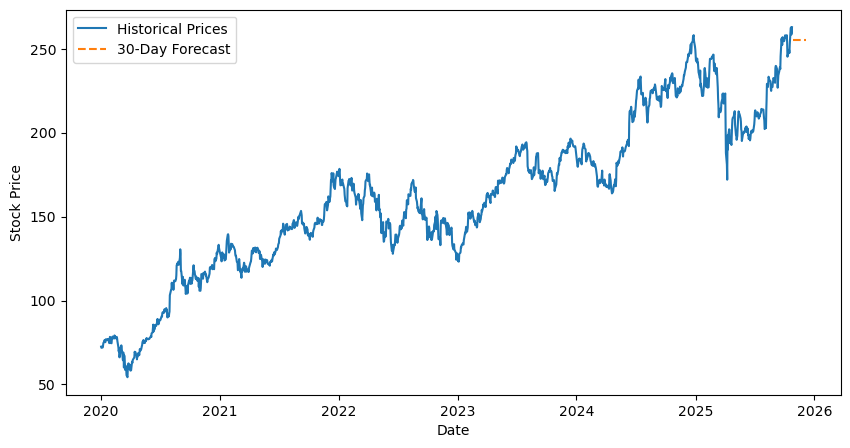

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Historical Prices')
plt.plot(forecast, label='30-Day Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

###### The Blue is the Last 60 days of data.

##### Moving Average & RSI

In [65]:
# Step X: Calculate Moving Average & RSI

# 20-day Moving Average
data['MA20'] = data['Close'].rolling(window=20).mean()

# RSI (14-day)
delta = data['Close'].diff()
gain = delta.clip(lower=0)
loss = -1*delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

##### Plotting with MA & RSI (replace our existing plot):

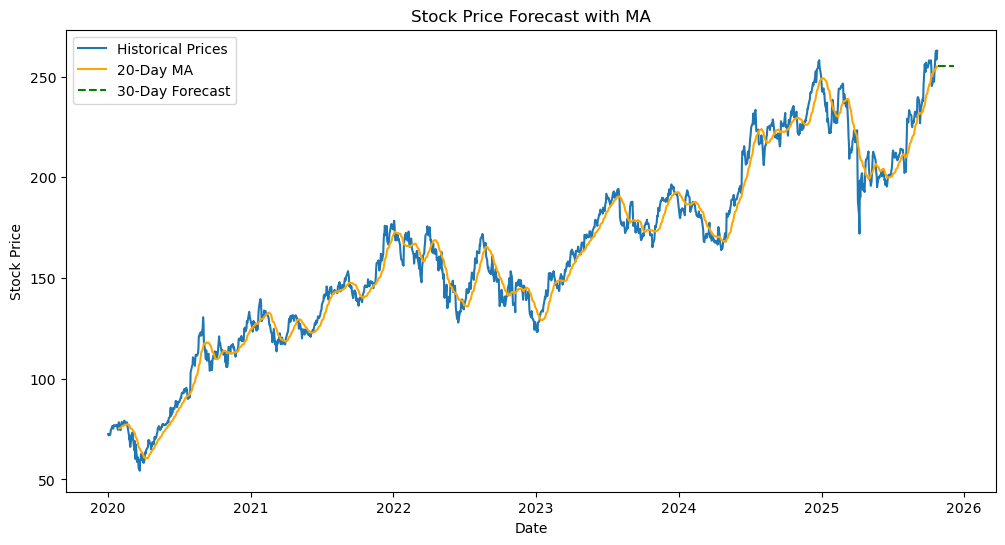

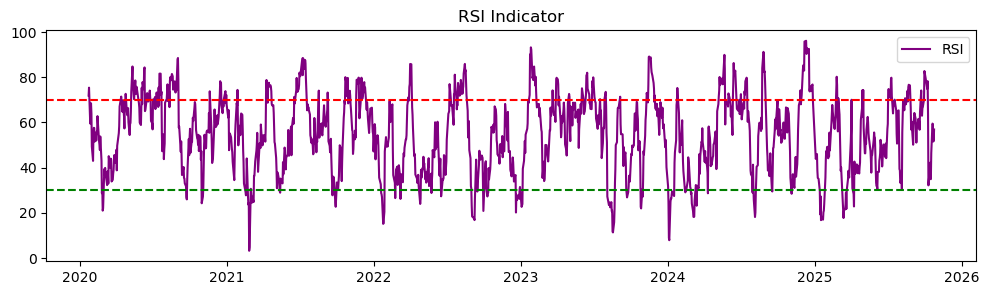

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Historical Prices')
plt.plot(data['MA20'], label='20-Day MA', color='orange')
plt.plot(forecast, label='30-Day Forecast', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast with MA')
plt.legend()
plt.show()git stat
# Optional: Plot RSI
plt.figure(figsize=(12,3))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')  # Overbought
plt.axhline(30, color='green', linestyle='--') # Oversold
plt.title('RSI Indicator')
plt.legend()
plt.show()


###### - **Historical Prices**: Original stock prices
###### - **20-Day MA**: Trend direction
###### - **30-Day Forecast**: Predicted future prices
###### - **RSI**: Overbought (>70) / Oversold (<30) indicator

#### END OF CODE